<a href="https://colab.research.google.com/github/lorduwahz/Data-Science/blob/main/Francis_Euston_Pandas_Data_Visualization_Individual_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='green'>**Data Visualization using Python Individual Assessment.**</font>

## Case Study COVID-19
* The data can be accessed online here <a href="https://covid19.who.int/table">WHO Coronavirus Disease (COVID-19) Dashboard</a>

## Available columns
* Date_reported - Date of the observation in YYYY/MM/DD
* Country Code - Code for Country of the observation (Could be empty when missing)
* Country - Country of observation
* WHO_region - Region of observation
* New_cases - Number of confirmed cases till that date
* Cumulative_cases - Cumulative number of confirmed cases
* New_deaths - Number of deaths cases
* Cumulative_deaths - Cumulative number of deaths cases

In [1]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt

#load data set
data = pd.read_csv('WHO-COVID-19-global-data.csv')
# Converting Date_reported to datetime
data['Date_reported']=pd.to_datetime(data['Date_reported'])

In [2]:
#view first 5 rows
data.head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0
5,2020-02-29,AF,Afghanistan,EMRO,0,5,0,0
6,2020-03-01,AF,Afghanistan,EMRO,0,5,0,0
7,2020-03-02,AF,Afghanistan,EMRO,0,5,0,0
8,2020-03-03,AF,Afghanistan,EMRO,0,5,0,0
9,2020-03-04,AF,Afghanistan,EMRO,0,5,0,0


In [3]:
#check for sum of missing values by column
data.isnull().sum()

Date_reported           0
 Country_code         172
 Country                0
 WHO_region             0
 New_cases              0
 Cumulative_cases       0
 New_deaths             0
 Cumulative_deaths      0
dtype: int64

In [4]:
#check column names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38785 entries, 0 to 38784
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date_reported       38785 non-null  datetime64[ns]
 1    Country_code       38613 non-null  object        
 2    Country            38785 non-null  object        
 3    WHO_region         38785 non-null  object        
 4    New_cases          38785 non-null  int64         
 5    Cumulative_cases   38785 non-null  int64         
 6    New_deaths         38785 non-null  int64         
 7    Cumulative_deaths  38785 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 2.4+ MB


In [5]:
#remove spaces in column names
data.columns = data.columns.str.replace(' ', '')

In [6]:
#confirm spaces removed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38785 entries, 0 to 38784
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      38785 non-null  datetime64[ns]
 1   Country_code       38613 non-null  object        
 2   Country            38785 non-null  object        
 3   WHO_region         38785 non-null  object        
 4   New_cases          38785 non-null  int64         
 5   Cumulative_cases   38785 non-null  int64         
 6   New_deaths         38785 non-null  int64         
 7   Cumulative_deaths  38785 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 2.4+ MB


In [7]:
#check data size
data.shape

(38785, 8)


Visualize cases(`Cumulative_cases` and `Cumulative_deaths`) on a line graph.

In [53]:
%matplotlib inline

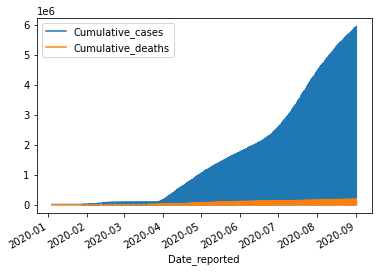

In [54]:
data.plot(x='Date_reported', y=['Cumulative_cases', 'Cumulative_deaths'])

We can pick out three obvious thingd from the plot above.
Cumulative cases and deaths were on the same level during the start of the pandemic but the ratio falls drastically as the year goes on. This mostly likely due to the fact that the COVID 19 was better managed as time goes on. 
The below separate plots of cumulative cases and deaths gives us the individual numbers for better clarity.

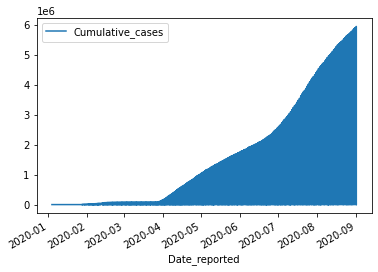

In [11]:
data.plot(x='Date_reported', y='Cumulative_cases')

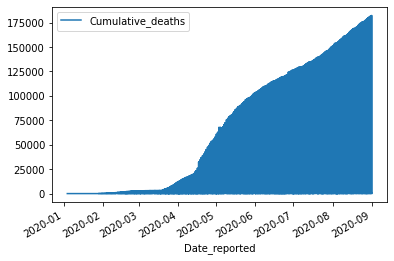

In [13]:
data.plot(x='Date_reported', y='Cumulative_deaths')

From the above plot, by September 2020 cumulative cases peaked at alomost 6,000,000 while cumulative peaked at a little above 175,000.
This explains clearly the shape of the first plot (Date_reported against Cumulative_cases and Cumulative_deaths.


Visualize the Top 5 countries with confirmed new cases and deaths

In [ ]:
top_5_cases = data.groupby('Country', as_index=False)[['New_cases','New_deaths','Cumulative_cases','Cumulative_deaths']].apply(sum).sort_values(by=['New_cases'], ascending=False)
top_5_cases_plt = top_5_cases.head()
top_5_cases_plt

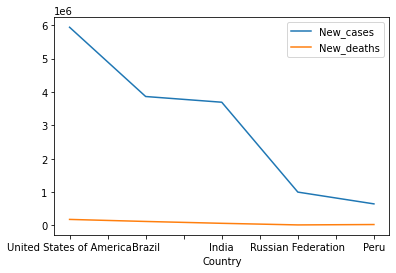

In [16]:
top_5_cases_plt.plot(x='Country', y=['New_cases', 'New_deaths'])

In [ ]:
top_5_deaths = data.groupby('Country', as_index=False)[['New_cases','New_deaths','Cumulative_cases','Cumulative_deaths']].apply(sum).sort_values(by=['New_deaths'], ascending=False)
top_5_deaths_plt = top_5_deaths.head()
top_5_deaths_plt

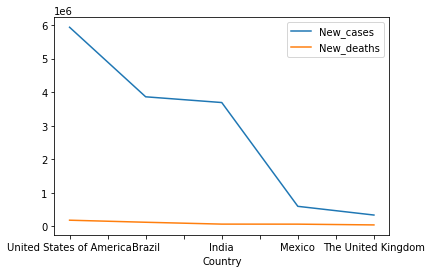

In [18]:
top_5_deaths_plt.plot(x='Country', y=['New_cases', 'New_deaths'])

From the first plot above, emphasis was laid on the new cases for which America, Brazil, India, Russia and Peru were at the top. A change in emphasis to new deaths saw Mexico and the United Kingdom push off Russia and Peru while the top three retained their spots. We can deduse from these plots that Mexico and the United Kingdom have a lower new cases to death ratio than Russia and Peru.


Show the trend of the top 10 countries with with mean confirmed new cases and deaths

In [19]:
top_5_cases = data.groupby('Country', as_index=False)[['New_cases','New_deaths','Cumulative_cases','Cumulative_deaths']].apply(sum).sort_values(by=['New_cases'], ascending=False)
top_5_cases_plt = top_5_cases.head(10)
top_5_cases_plt.describe()

,New_cases,New_deaths,Cumulative_cases,Cumulative_deaths
count,1.000000e+01,10.000000,1.000000e+01,1.000000e+01
mean,1.781910e+06,55233.600000,9.977300e+07,3.922505e+06
std,1.970116e+06,56101.008835,1.195954e+08,4.921903e+06
min,4.117260e+05,11289.000000,2.182728e+07,5.720170e+05
25%,5.988652e+05,17815.250000,3.129575e+07,8.358250e+05
50%,6.371035e+05,28899.500000,3.839649e+07,2.152560e+06
75%,3.018386e+06,65005.500000,1.171511e+08,4.007436e+06
max,5.936572e+06,182162.000000,3.992444e+08,1.650078e+07


In [34]:
top_10_mean = data.groupby('Country', as_index=False)['New_cases', 'New_deaths'].mean().sort_values('New_cases', ascending = False).head(10)
top_10_mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Country,New_cases,New_deaths
207,United States of America,26268.017699,806.026549
27,Brazil,20435.507937,639.301587
93,India,17088.731481,302.259259
163,Russian Federation,4651.386047,80.460465
154,Peru,3615.452514,160.826816
184,South Africa,3464.314917,78.171271
42,Colombia,3377.433333,107.577778
129,Mexico,3186.315508,343.090909
40,Chile,2249.868852,61.688525
7,Argentina,2231.836066,46.437158


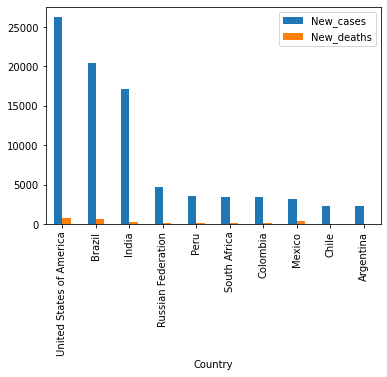

In [38]:
top_10_mean.head(10).plot(x='Country', y=['New_cases', 'New_deaths'], kind='bar')